In [327]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [367]:
def plot(image):
    plt.imshow(image,'gray')
    plt.show()

In [363]:
"""
this function is applied on each template , to get its featues ,, 
then we could match it with any input image that will be tested
"""
def get_currency_feature(img):
    #to ensure that image is in gray scale
    if(len(img.shape)==3):
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #declaring orb object
    orb=cv2.ORB_create()
    #find key points with ORB
    kp = orb.detect(img,None)
    # compute the descriptors with ORB
    kp, des = orb.compute(img, kp)
    
    return kp, des
    

In [343]:
def crop_image(image,x=40,y=40):
    r=[x,y,image.shape[1]-x,image.shape[0]-y]
    imCrop = image[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
    return imCrop

In [370]:
"""
thresholding each image before extract the non useful background features
"""
def thresoldd(image,typee):
    if(len(image.shape)==3):
        image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    if (typee =='test'):
        #blurred=cv2.blur(image,(25,25))
        #th = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 1)
        #th=cv2.blur(th,(25,25))
        #ret,th=cv2.threshold(th,210,255,cv2.THRESH_BINARY)
        blurred=cv2.blur(image,(25,25))
        th = cv2.adaptiveThreshold(blurred, 150, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11, 1)
        th=cv2.blur(th,(7,7))
        plot(th)
    else :
        ret,th=cv2.threshold(image,150,255,cv2.THRESH_BINARY)
    return cv2.addWeighted(image,0,th,1,0)

In [345]:
"""
x : the input image that will act as template

kp and des : the features of image to be tested .
"""

def guess(template_image, input_Kp, input_des): #kp,des of the input image , x is the images/
    #template_image=thresoldd(template_image,'template')
    template_kp,template_des=get_currency_feature(template_image)
    # create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    # Match descriptors.
    matches = bf.match(input_des, template_des)
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
    sum_of_matches=0 
    
    n_of_matches =7
    
    for i in range (0 , n_of_matches):
        sum_of_matches = sum_of_matches+ matches[i].distance  # getting list of top 7 matches' distances
    return sum_of_matches

In [373]:
class our_templates:
    templates_values = []
    num_of_templates = 0 
    templates_list  =[]
    #add any new templates here
    def __init__(self):
        
        half_pound_front=cv2.imread('dataset//templates//half_pound_coin_front.png')
        self.templates_list.append(half_pound_front)
        self.templates_values.append(0.5)
        
        half_pound_back=cv2.imread('dataset//templates//half_pound_coin_back.png')
        self.templates_list.append(half_pound_back)
        self.templates_values.append(0.5)
        
        one_pound_back=cv2.imread('dataset//templates//one_pound_coin_back.png')
        self.templates_list.append(one_pound_back)
        self.templates_values.append(1)
        
        one_pound_front=cv2.imread('dataset//templates//one_pound_coin_front.png')
        self.templates_list.append(one_pound_front)
        self.templates_values.append(1)

        one_pound_back_paper=cv2.imread('dataset//templates//one_pound_paper_back.png')
        self.templates_list.append(one_pound_back_paper)
        self.templates_values.append(1)
        
        one_pound_front_paper=cv2.imread('dataset//templates//one_pound_paper_front.png')
        self.templates_list.append(one_pound_front_paper)
        self.templates_values.append(1)
                
        ten_pound_front_paper=cv2.imread('dataset//templates//10_front.png')
        self.templates_list.append(ten_pound_front_paper)
        self.templates_values.append(10)
        
                
        ten_pound_back_paper=cv2.imread('dataset//templates//10_back.png')
        self.templates_list.append(ten_pound_back_paper)
        self.templates_values.append(10)
        
        five_pound_front_paper=cv2.imread('dataset//templates//5 part_1.jpg')
        self.templates_list.append(five_pound_front_paper)
        self.templates_values.append(5)
        
        five_pound_back_paper=cv2.imread('dataset//templates//five_pound_paper_back.jpg')
        self.templates_list.append(five_pound_back_paper)
        self.templates_values.append(5)
        
        self.num_of_templates = len(self.templates_values)
        
        
        

In [361]:

def estimate( input_kp, input_des , templates,label):
    overall_matches=[] 
    for i in range(0 ,templates.num_of_templates ):
        #print(templates.templates_list[i])
        overall_matches.append( guess(templates.templates_list[i] ,input_kp , input_des )  )
    
    minimum_dis = overall_matches.index(min(overall_matches)) #getting index of the predicted banknote
    print('minm distance:',overall_matches[minimum_dis])
    predicted = templates.templates_values[minimum_dis]
    #print(type(label))
    print("preddicted = {0} ,index = {1},expected:{2:s}".format(predicted , minimum_dis , label))
    return predicted,overall_matches[minimum_dis]


In [348]:
##test_pictures
project_path=os.getcwd()
project_path=os.path.join('E:\computer vision\-Money_detector_and_estimator-master')
print(project_path)
data_path=os.path.join("E:\computer vision\-Money_detector_and_estimator-master\dataset\samples\dataset")
training_data=[]
training_label=[]
print(os.listdir(data_path))
###access folders and collect data for each class###
for i in os.listdir(data_path):
    for j in os.listdir(os.path.join(data_path,i)):
        training_data.append(cv2.imread(os.path.join(os.path.join(data_path,i),j),0))
        training_label.append(j[:-3])
print(len(training_data),len(training_label))

E:\computer vision\-Money_detector_and_estimator-master
['Test']
26 26


In [147]:
"""
## mobile camera test
samples_list = []
#five samples

five1 =cv2.imread('dataset//five_samples//five1.png')
samples_list.append(five1)
five2 =cv2.imread('dataset//five_samples//five2.png')
samples_list.append(five2)
five3 =cv2.imread('dataset//five_samples//five3.png')
samples_list.append(five3)
five4 =cv2.imread('dataset//five_samples//five4.png')
samples_list.append(five4)
five5 =cv2.imread('dataset//five_samples//five5.png')
samples_list.append(five5)
five6 =cv2.imread('dataset//five_samples//five6.png')
samples_list.append(five6)
five7 =cv2.imread('dataset//five_samples//five7.png')
samples_list.append(five7)
five8 =cv2.imread('dataset//five_samples//five8.png')
samples_list.append(five8)
five9 =cv2.imread('dataset//five_samples//five9.png')
samples_list.append(five9)
five10 =cv2.imread('dataset//five_samples//five10.png')
samples_list.append(five10)
five11 =cv2.imread('dataset//five_samples//five11.png')
samples_list.append(five11)
five12 =cv2.imread('dataset//five_samples//five12.png')
samples_list.append(five12)


num_of_samples = len(samples_list)"""

In [304]:
#samples_list_threshold=[]
#for i,m in enumerate(training_data):
#    samples_list_threshold.append(thresoldd(m,'test'))

In [325]:
#keys_and_des = []

#for i in range(0,len(training_data)):
#    keys_and_des.append(get_currency_feature(training_data[i]))
#len(keys_and_des)

26

In [349]:
"""
prprocessing the inputt image and then extract feature from it
plus cropping the image to make sure no backgroung features are taking into consideration
"""
def preprocessing_exctracting(image,x,y):
    new_image=crop_image(image,x,y)
    new_image=thresoldd(new_image,'test')
    kp,des=get_currency_feature(new_image)
    return new_image,kp,des
        

min_dist_old: 0 min_dist_new: 0


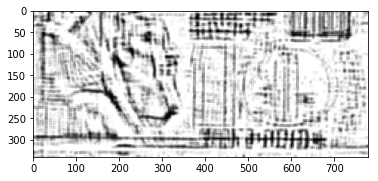

minm distance: 307.0
preddicted = 10 ,index = 6,expected:10_back.
min_dist_old: 0 min_dist_new: 307.0


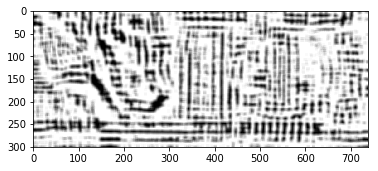

minm distance: 317.0
preddicted = 10 ,index = 7,expected:10_back.
min_dist_old: 0 min_dist_new: 0


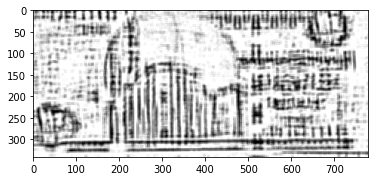

minm distance: 325.0
preddicted = 10 ,index = 6,expected:10_front.
min_dist_old: 0 min_dist_new: 325.0


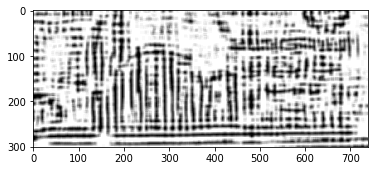

minm distance: 317.0
preddicted = 5 ,index = 8,expected:10_front.
min_dist_old: 325.0 min_dist_new: 317.0


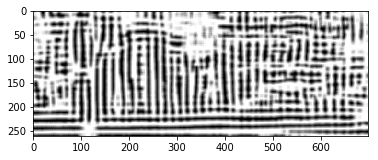

minm distance: 338.0
preddicted = 10 ,index = 6,expected:10_front.
min_dist_old: 0 min_dist_new: 0


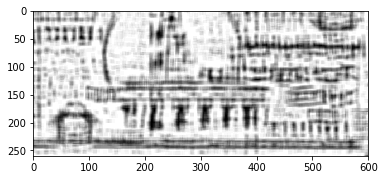

minm distance: 323.0
preddicted = 10 ,index = 6,expected:5_part_1.
min_dist_old: 0 min_dist_new: 323.0


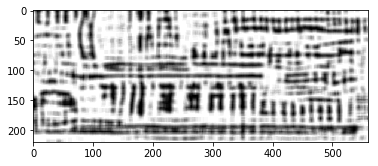

minm distance: 322.0
preddicted = 5 ,index = 8,expected:5_part_1.
min_dist_old: 323.0 min_dist_new: 322.0


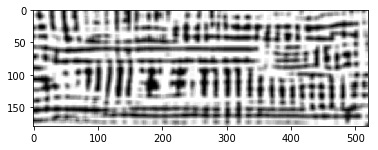

minm distance: 334.0
preddicted = 5 ,index = 8,expected:5_part_1.
min_dist_old: 0 min_dist_new: 0


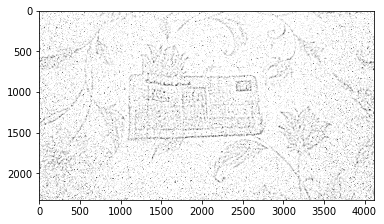

minm distance: 319.0
preddicted = 10 ,index = 6,expected:five (1).
min_dist_old: 0 min_dist_new: 319.0


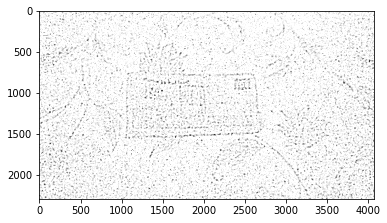

minm distance: 295.0
preddicted = 5 ,index = 8,expected:five (1).
min_dist_old: 319.0 min_dist_new: 295.0


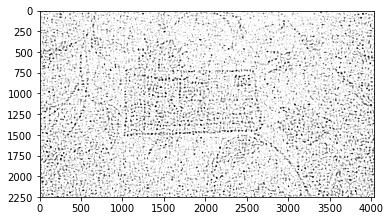

minm distance: 302.0
preddicted = 5 ,index = 8,expected:five (1).
min_dist_old: 0 min_dist_new: 0


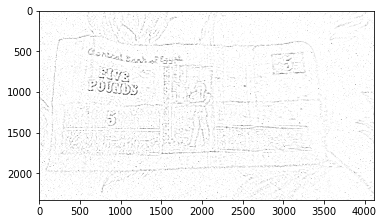

minm distance: 267.0
preddicted = 10 ,index = 6,expected:five (14).
min_dist_old: 0 min_dist_new: 267.0


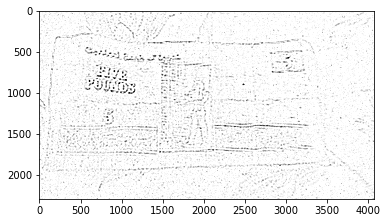

minm distance: 278.0
preddicted = 5 ,index = 8,expected:five (14).
min_dist_old: 0 min_dist_new: 0


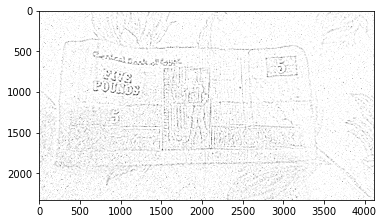

minm distance: 286.0
preddicted = 10 ,index = 6,expected:five (15).
min_dist_old: 0 min_dist_new: 286.0


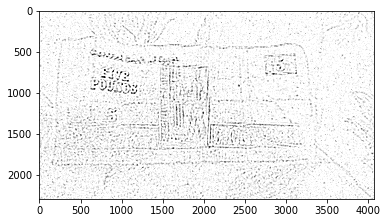

minm distance: 296.0
preddicted = 5 ,index = 8,expected:five (15).
min_dist_old: 0 min_dist_new: 0


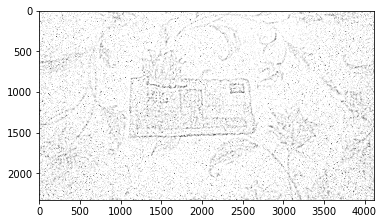

minm distance: 294.0
preddicted = 10 ,index = 6,expected:five (2).
min_dist_old: 0 min_dist_new: 294.0


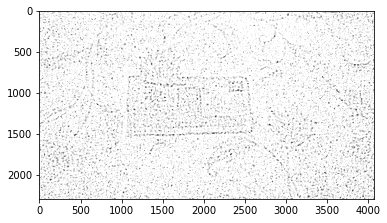

minm distance: 287.0
preddicted = 5 ,index = 8,expected:five (2).
min_dist_old: 294.0 min_dist_new: 287.0


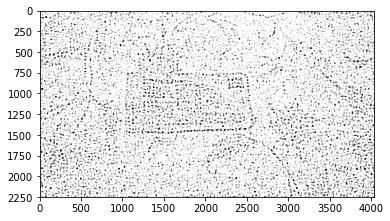

minm distance: 319.0
preddicted = 5 ,index = 8,expected:five (2).
min_dist_old: 0 min_dist_new: 0


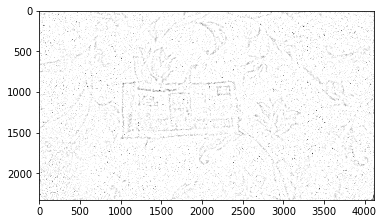

minm distance: 297.0
preddicted = 10 ,index = 6,expected:five (25).
min_dist_old: 0 min_dist_new: 297.0


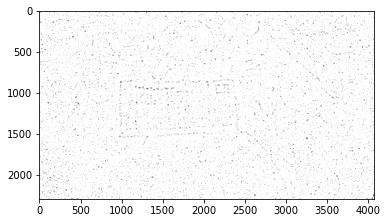

minm distance: 295.0
preddicted = 10 ,index = 6,expected:five (25).
min_dist_old: 297.0 min_dist_new: 295.0


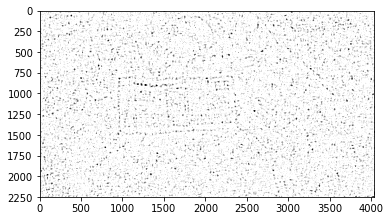

minm distance: 301.0
preddicted = 10 ,index = 6,expected:five (25).
min_dist_old: 0 min_dist_new: 0


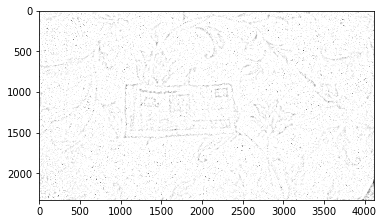

minm distance: 292.0
preddicted = 10 ,index = 6,expected:five (26).
min_dist_old: 0 min_dist_new: 292.0


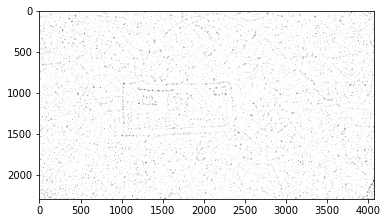

minm distance: 304.0
preddicted = 10 ,index = 6,expected:five (26).
min_dist_old: 0 min_dist_new: 0


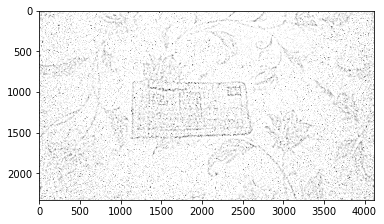

minm distance: 319.0
preddicted = 10 ,index = 6,expected:five (3).
min_dist_old: 0 min_dist_new: 319.0


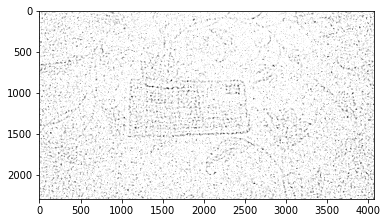

minm distance: 302.0
preddicted = 5 ,index = 8,expected:five (3).
min_dist_old: 319.0 min_dist_new: 302.0


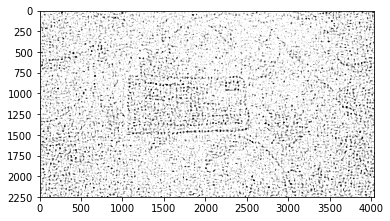

minm distance: 317.0
preddicted = 10 ,index = 6,expected:five (3).
min_dist_old: 0 min_dist_new: 0


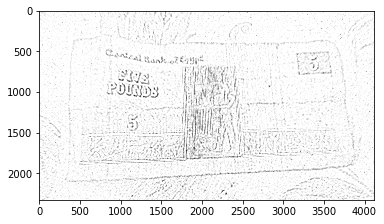

minm distance: 269.0
preddicted = 5 ,index = 8,expected:five (35).
min_dist_old: 0 min_dist_new: 269.0


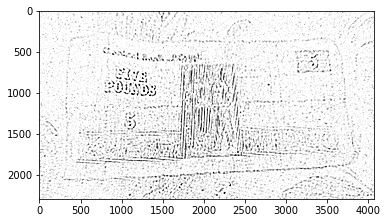

minm distance: 312.0
preddicted = 5 ,index = 8,expected:five (35).
min_dist_old: 0 min_dist_new: 0


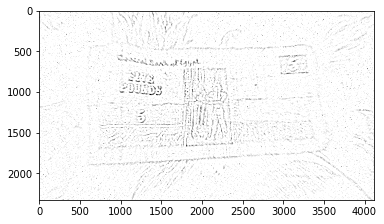

minm distance: 280.0
preddicted = 10 ,index = 6,expected:five (36).
min_dist_old: 0 min_dist_new: 280.0


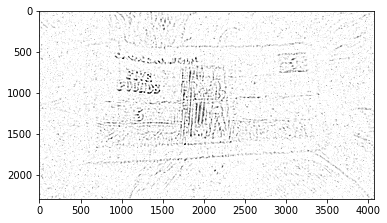

minm distance: 316.0
preddicted = 10 ,index = 6,expected:five (36).
min_dist_old: 0 min_dist_new: 0


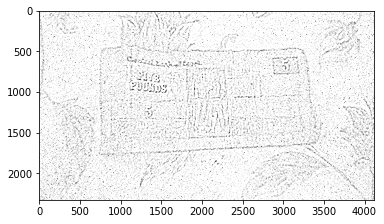

minm distance: 313.0
preddicted = 10 ,index = 6,expected:five (37).
min_dist_old: 0 min_dist_new: 313.0


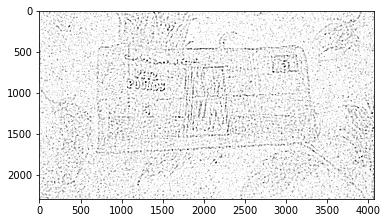

minm distance: 304.0
preddicted = 10 ,index = 6,expected:five (37).
min_dist_old: 313.0 min_dist_new: 304.0


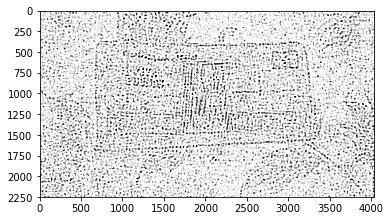

minm distance: 336.0
preddicted = 5 ,index = 8,expected:five (37).
min_dist_old: 0 min_dist_new: 0


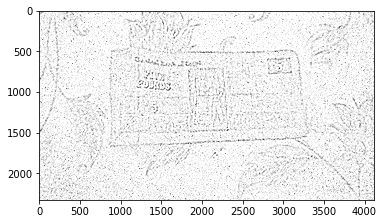

minm distance: 313.0
preddicted = 5 ,index = 8,expected:five (38).
min_dist_old: 0 min_dist_new: 313.0


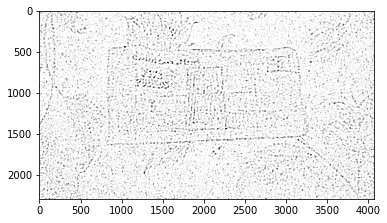

minm distance: 304.0
preddicted = 10 ,index = 6,expected:five (38).
min_dist_old: 313.0 min_dist_new: 304.0


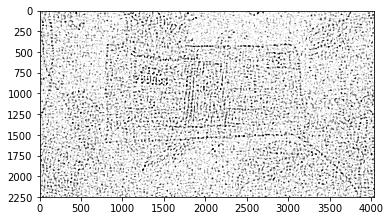

minm distance: 327.0
preddicted = 5 ,index = 8,expected:five (38).
min_dist_old: 0 min_dist_new: 0


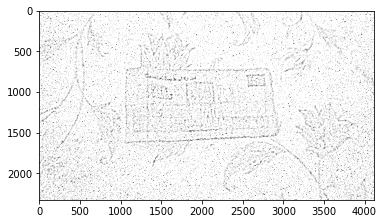

minm distance: 302.0
preddicted = 10 ,index = 6,expected:five (41).
min_dist_old: 0 min_dist_new: 302.0


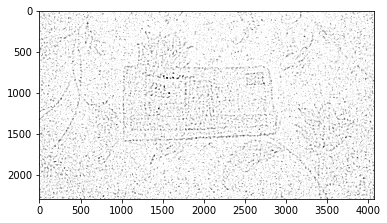

minm distance: 289.0
preddicted = 10 ,index = 6,expected:five (41).
min_dist_old: 302.0 min_dist_new: 289.0


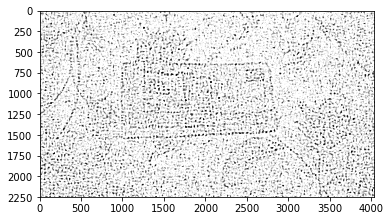

minm distance: 299.0
preddicted = 5 ,index = 8,expected:five (41).
min_dist_old: 0 min_dist_new: 0


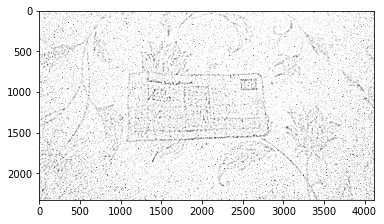

minm distance: 328.0
preddicted = 10 ,index = 6,expected:five (42).
min_dist_old: 0 min_dist_new: 328.0


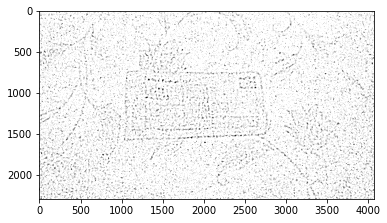

minm distance: 295.0
preddicted = 10 ,index = 6,expected:five (42).
min_dist_old: 328.0 min_dist_new: 295.0


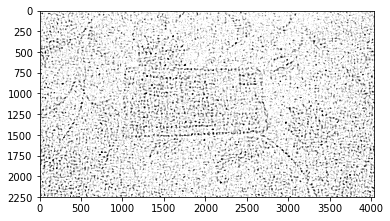

minm distance: 322.0
preddicted = 5 ,index = 8,expected:five (42).
min_dist_old: 0 min_dist_new: 0


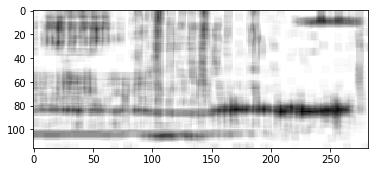

minm distance: 353.0
preddicted = 10 ,index = 6,expected:five_pound_paper_back.
min_dist_old: 0 min_dist_new: 353.0


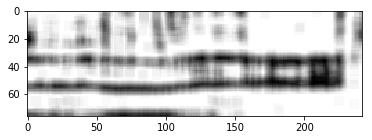

minm distance: 387.0
preddicted = 10 ,index = 7,expected:five_pound_paper_back.
min_dist_old: 0 min_dist_new: 0


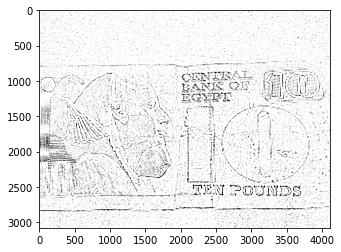

minm distance: 304.0
preddicted = 5 ,index = 8,expected:ten (1).
min_dist_old: 0 min_dist_new: 304.0


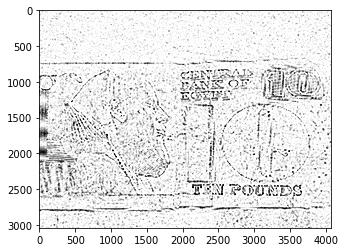

minm distance: 313.0
preddicted = 10 ,index = 6,expected:ten (1).
min_dist_old: 0 min_dist_new: 0


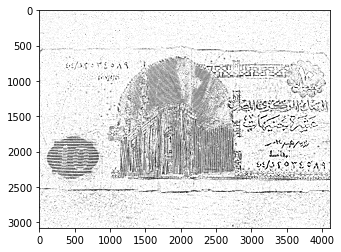

minm distance: 285.0
preddicted = 10 ,index = 6,expected:ten (2).
min_dist_old: 0 min_dist_new: 285.0


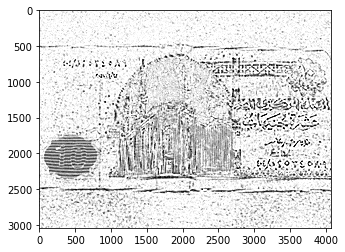

minm distance: 316.0
preddicted = 10 ,index = 6,expected:ten (2).
min_dist_old: 0 min_dist_new: 0


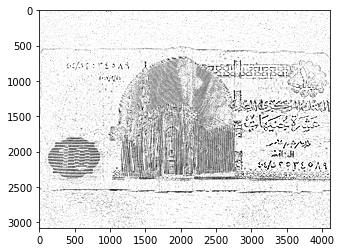

minm distance: 292.0
preddicted = 10 ,index = 6,expected:ten (3).
min_dist_old: 0 min_dist_new: 292.0


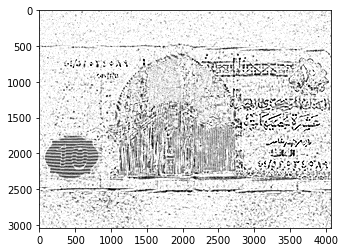

minm distance: 304.0
preddicted = 10 ,index = 6,expected:ten (3).
min_dist_old: 0 min_dist_new: 0


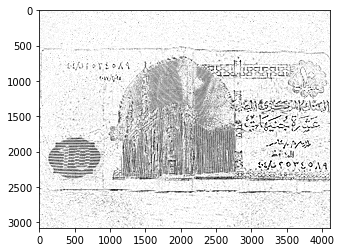

minm distance: 307.0
preddicted = 10 ,index = 6,expected:ten (4).
min_dist_old: 0 min_dist_new: 307.0


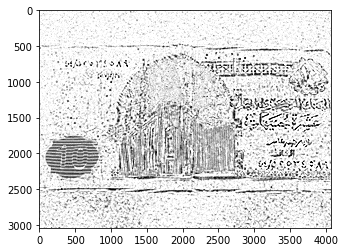

minm distance: 317.0
preddicted = 10 ,index = 6,expected:ten (4).
min_dist_old: 0 min_dist_new: 0


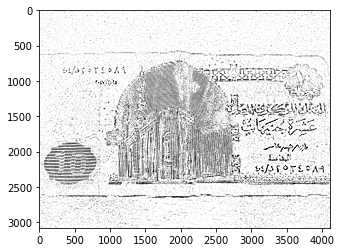

minm distance: 300.0
preddicted = 10 ,index = 6,expected:ten (5).
min_dist_old: 0 min_dist_new: 300.0


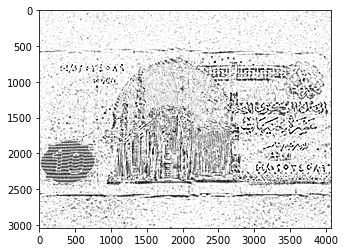

minm distance: 331.0
preddicted = 5 ,index = 8,expected:ten (5).
min_dist_old: 0 min_dist_new: 0


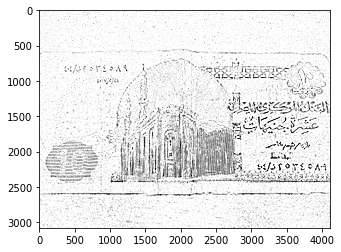

minm distance: 272.0
preddicted = 10 ,index = 6,expected:ten (6).
min_dist_old: 0 min_dist_new: 272.0


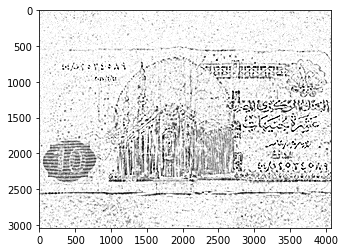

minm distance: 311.0
preddicted = 5 ,index = 8,expected:ten (6).
min_dist_old: 0 min_dist_new: 0


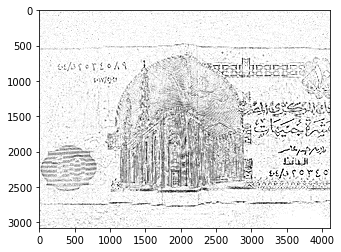

minm distance: 298.0
preddicted = 5 ,index = 8,expected:ten (7).
min_dist_old: 0 min_dist_new: 298.0


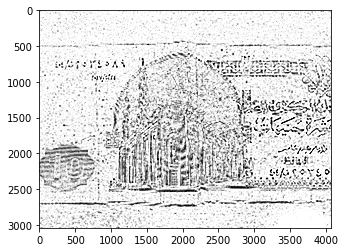

minm distance: 310.0
preddicted = 10 ,index = 6,expected:ten (7).
min_dist_old: 0 min_dist_new: 0


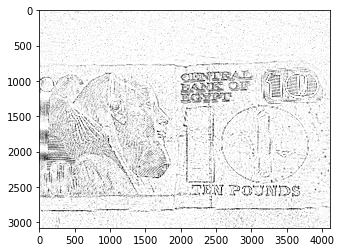

minm distance: 296.0
preddicted = 10 ,index = 6,expected:ten (8).
min_dist_old: 0 min_dist_new: 296.0


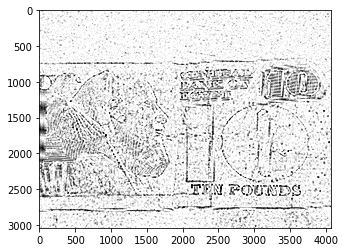

minm distance: 319.0
preddicted = 10 ,index = 6,expected:ten (8).
min_dist_old: 0 min_dist_new: 0


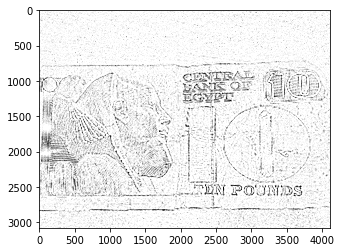

minm distance: 307.0
preddicted = 5 ,index = 8,expected:ten (9).
min_dist_old: 0 min_dist_new: 307.0


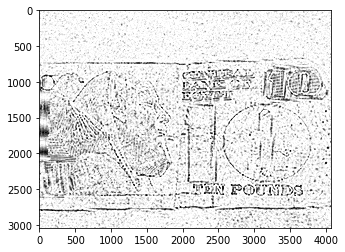

minm distance: 334.0
preddicted = 10 ,index = 6,expected:ten (9).


In [374]:
templatess = our_templates()
results = []
counter=0
for i in range(0,len(training_data)):
    #plt.imshow(samples_list[i])
    #plt.show()
    #print(type(training_label[i]))
    min_dist_old=0
    min_dist_new=0
    test_img=training_data[i]
    label=training_label[i]
    #print(i)
    while(min_dist_new<=min_dist_old or min_dist_old==0):
        print('min_dist_old:',min_dist_old,'min_dist_new:',min_dist_new)
        min_dist_old=min_dist_new
        test_img,kp,des=preprocessing_exctracting(test_img,40,40)
        _,min_dist_new=estimate(kp , des , templatess,label)
        #if(min_dist_new<=min_dist_old):
            #counter=counter+1
        



#money_detected=first_image+second_image

#print(money_detected)